In [1]:
import pickle
import numpy as np
def psave(filename, object):
    file_write=open(filename, "wb")
    pickle.dump(object, file_write)
    file_write.close()
    return
def pload(filename):
    file_read=open(filename,mode="rb")
    file = pickle.load(file_read)
    file_read.close()
    return file

In [2]:
import sys
sys.path.append("../../")
from matplotlib import pyplot as plt

In [3]:
n_simulations,step_size,tot_time_frame,n_features=pload("sim_argument.list")
n_step=tot_time_frame/step_size
dict_train=pload("results.dict")

In [4]:
# n_features=73
# time_frame=1000
# step_size=20
# n_step=time_frame/step_size

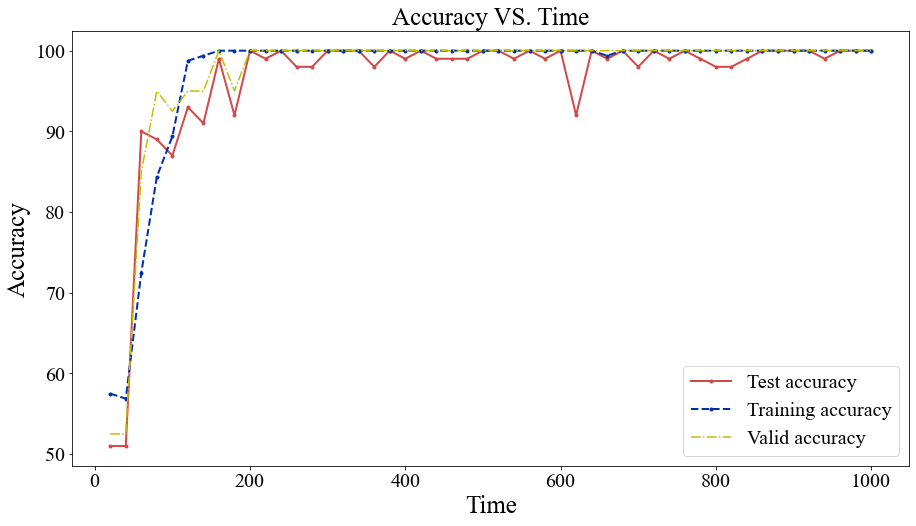

In [5]:
x = [step_size*(i+1) for i in range (len(dict_train))]
test=[ dict_train[v]["accuracy"][2][1]*100 for v in range (len(dict_train))]
valid=[ max(dict_train[z]["accuracy"][1])*100 for z in range (len(dict_train))]
train=[ max(dict_train[t]["accuracy"][0])*100 for t in range (len(dict_train))]

plt.figure(figsize=(15,8))
plt.title("Accuracy VS. Time",fontdict={"family": "Times New Roman", "size": 25})
plt.plot(x, test,color=(212/255,72/255,72/255), linewidth=2,marker="o",markersize=3,label="Test accuracy")
plt.plot(x, train,"--" ,color=(0/255, 47/255, 167/255),linewidth=2,marker="o",markersize=3,label="Training accuracy")
plt.plot(x, valid, "y-.", label="Valid accuracy")
plt.legend(prop={"family": "Times New Roman", "size": 20})
plt.xticks(fontname="Times New Roman", fontsize=20)
plt.yticks(fontname="Times New Roman", fontsize=20)
plt.xlabel('Time',fontdict={"family": "Times New Roman", "size": 25})
plt.ylabel('Accuracy',fontdict={"family": "Times New Roman", "size": 25})
plt.show()

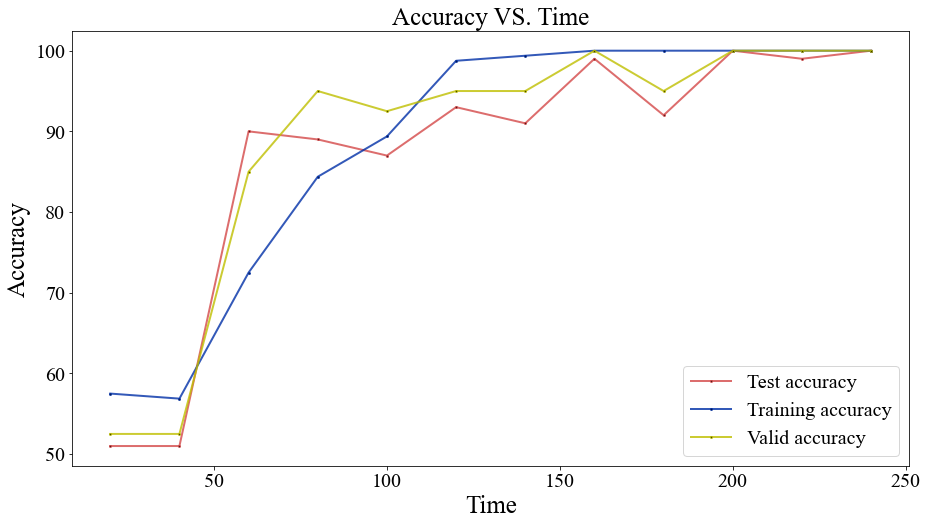

In [33]:
def view_acc(data,step_size,time_edge):
    steps_to_view=int(time_edge/step_size)
    x = [step_size*(i+1) for i in range (steps_to_view)]
    test=[ dict_train[v]["accuracy"][2][1]*100 for v in range (steps_to_view)]
    valid=[ max(dict_train[z]["accuracy"][1])*100 for z in range (steps_to_view)]
    train=[ max(dict_train[t]["accuracy"][0])*100 for t in range (steps_to_view)]

    lsize=2
    msize=2
    mcolor="black"
    al=0.8

    plt.figure(figsize=(15,8))
    plt.title("Accuracy VS. Time",fontdict={"family": "Times New Roman", "size": 25})
    plt.plot(x, test,color=(212/255,72/255,72/255), linewidth=lsize,marker="o",markersize=msize,markerfacecolor=mcolor,alpha=al,label="Test accuracy")
    plt.plot(x, train,"-" ,color=(0/255, 47/255, 167/255),linewidth=lsize,marker="o",markersize=msize,markerfacecolor=mcolor,alpha=al,label="Training accuracy")
    plt.plot(x, valid, "y-", linewidth=lsize,marker="o",markersize=msize,markerfacecolor=mcolor,alpha=al,label="Valid accuracy")
    plt.legend(prop={"family": "Times New Roman", "size": 20})
    plt.xticks(fontname="Times New Roman", fontsize=20)
    plt.yticks(fontname="Times New Roman", fontsize=20)
    plt.xlabel('Time',fontdict={"family": "Times New Roman", "size": 25})
    plt.ylabel('Accuracy',fontdict={"family": "Times New Roman", "size": 25})
    plt.savefig("1d_acc_{}".format(time_edge))
view_acc(dict_train,step_size,240)

Text(0.5, 0, 'Feature')

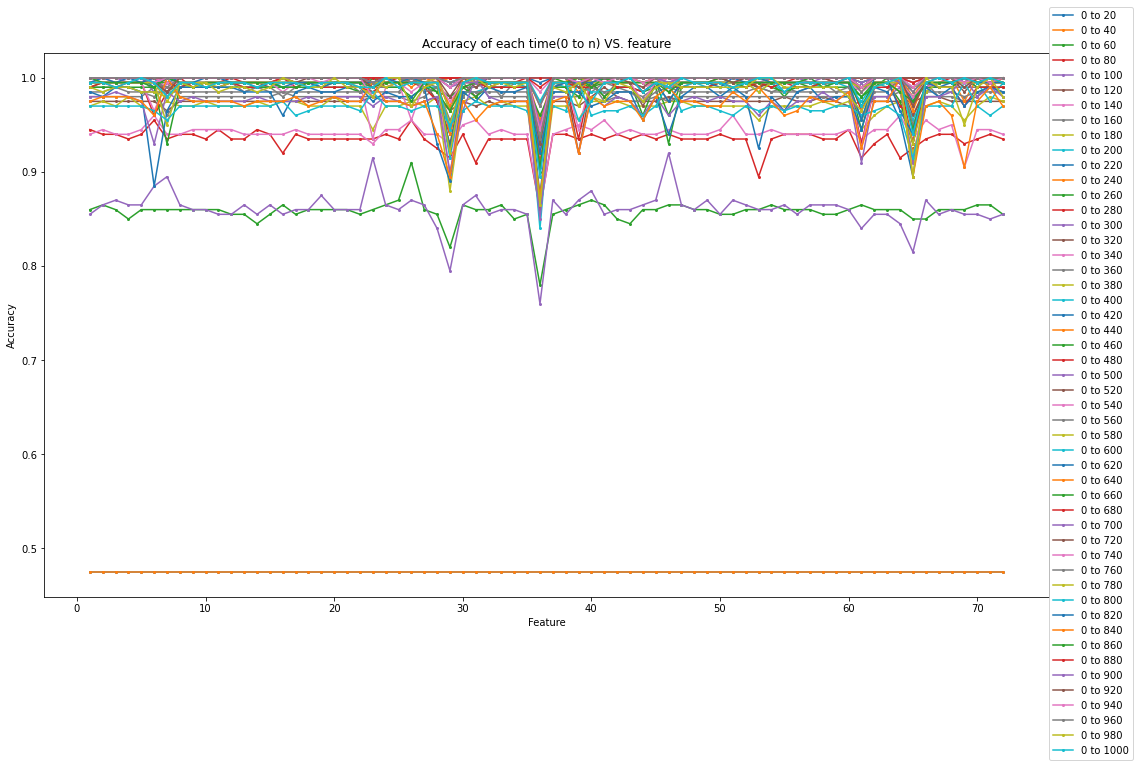

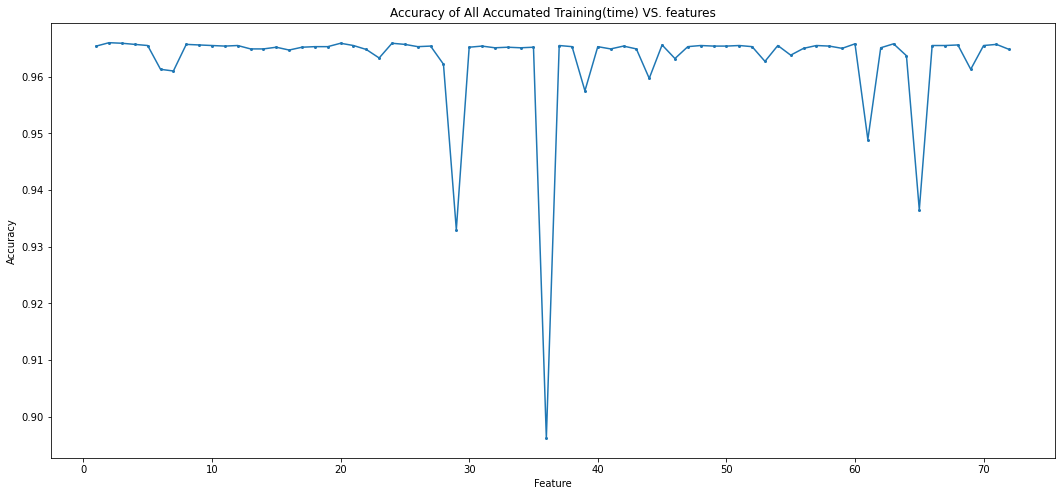

In [7]:
adrops = []
plt.figure(figsize=(18,10))
plt.title("Accuracy of each time(0 to n) VS. feature")
feature_x=[i+1 for i in range(n_features)] # x coordinate for n_featuers features  
all_adrops=[]
for run in range(len(dict_train)):
#     plt.figure()
    adrop = dict_train[run]["mltsa"]
#     print(np.array(adrop).shape)
    mean = np.mean(adrop, axis=0)# calculate the mean feature data of 200 trajs
    adrops.append(mean)
    all_adrops.append(adrop)# load all the adrop data from dict train, for next steps
#     plt.plot(feature_x,np.mean(adrops, axis=0),label="0 to {}".format((run+1)*20)) #
    plt.plot(feature_x,mean,label="0 to {}".format((run+1)*20),marker='o',markersize=2)
    plt.legend(bbox_to_anchor=(1, -0.3), loc=3, borderaxespad=0)
plt.xlabel('Feature')
plt.ylabel('Accuracy')

# adrops, list, len:50, adrops[0] is the features accuracy of the first training 
plt.figure(figsize=(18,8))
plt.title("Accuracy of All Accumated Training(time) VS. features")
plt.plot(feature_x,np.mean(adrops, axis=0),marker='o',markersize=2)
plt.ylabel("Accuracy")
plt.xlabel("Feature")

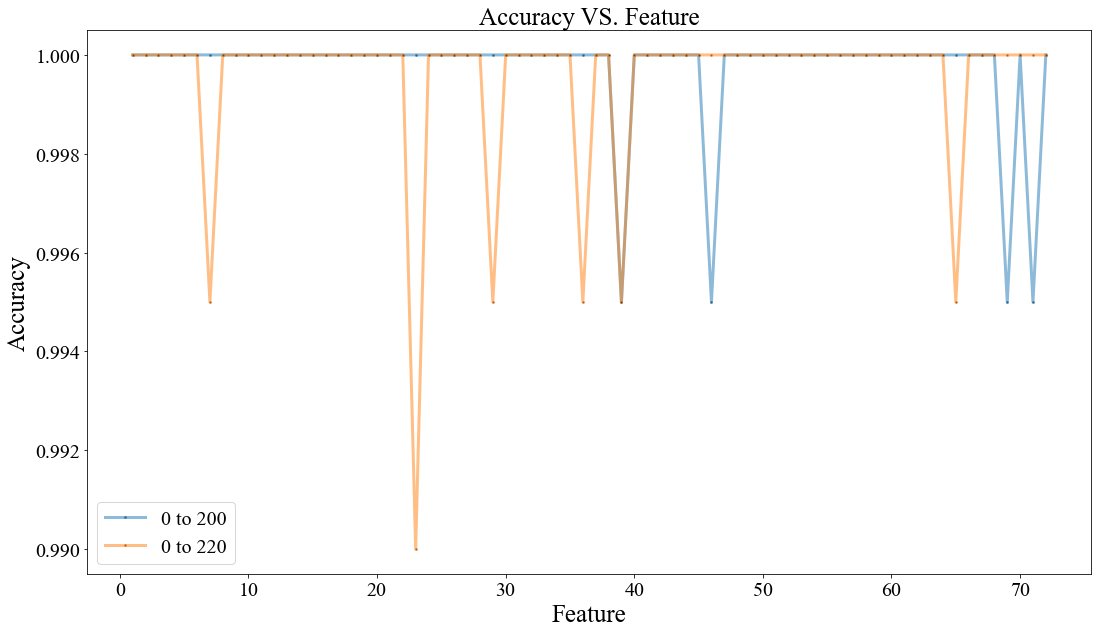

In [41]:
time = [200,220]
adrops = []
plt.figure(figsize=(18,10))
plt.title("Accuracy VS. Feature",fontdict={"family": "Times New Roman", "size": 25})
feature_x=[i+1 for i in range(n_features)] # x coordinate for n_featuers features  
all_adrops=[]
for run in range(len(dict_train)):

    adrop = dict_train[run]["mltsa"]
    mean = np.mean(adrop, axis=0)# calculate the mean feature data of 200 trajs
    adrops.append(mean)
    all_adrops.append(adrop)# load all the adrop data from dict train, for next steps
    if (run+1)*step_size in time:
        plt.plot(feature_x,mean,linewidth=3,label="0 to {}".format((run+1)*20),marker='o',markerfacecolor="black",markersize=2,alpha=0.5)
        plt.legend()
plt.xlabel('Feature',fontdict={"family": "Times New Roman", "size": 25})
plt.ylabel('Accuracy',fontdict={"family": "Times New Roman", "size": 25})
plt.legend(prop={"family": "Times New Roman", "size": 20})
plt.xticks(fontname="Times New Roman", fontsize=20)
plt.yticks(fontname="Times New Roman", fontsize=20)
plt.savefig("1D_feature_{}.png".format(time))

In [9]:
def top_n_important_features(dict_train,time,step_size,time_frame,top_number=1):
    
    adrops = [] # the list to save all the mean adrop accuracy over time, by superimposing the accuracy of all previous time
    min_features_dict={}
    for i in range(int(time/step_size)):
        adrop = dict_train[i]["mltsa"] # get adrop data from dict_train, shape:(n_simulations,n_features)
        mean = np.mean(adrop, axis=0) # (72,) superposition of all simulations, shape(n_features)
        adrops.append(mean) # save the adroped features accuracy to the list by each time
    current_mean_adrops=np.mean(np.array(adrops),axis=0)# mean adrop array,
    no_rep_adrop=list(set(current_mean_adrops.tolist())) # eliminate elements of repetition: array->list->set->list

    if top_number>len(no_rep_adrop):
        raise ValueError("Your index is over the number of different accuracy of features, try smaller!") # check the index is not over the list length
    min_feature=np.min(no_rep_adrop)# find the minimum feature
    location=np.where(current_mean_adrops==min_feature)[0] # get the location of the minimum feature(s)

    if top_number > 1 : #  if the index is not the top 1 important adropped feature 
        for i in range(top_number-1):
            no_rep_adrop.remove(min_feature)# delete minimum feature(s)
            min_feature=np.min(no_rep_adrop)# find minimum feature(s) after deleting the last minimum feature(s)
            location=np.where(current_mean_adrops==min_feature)[0]# find the loation of the minimum feature(s)

    return location


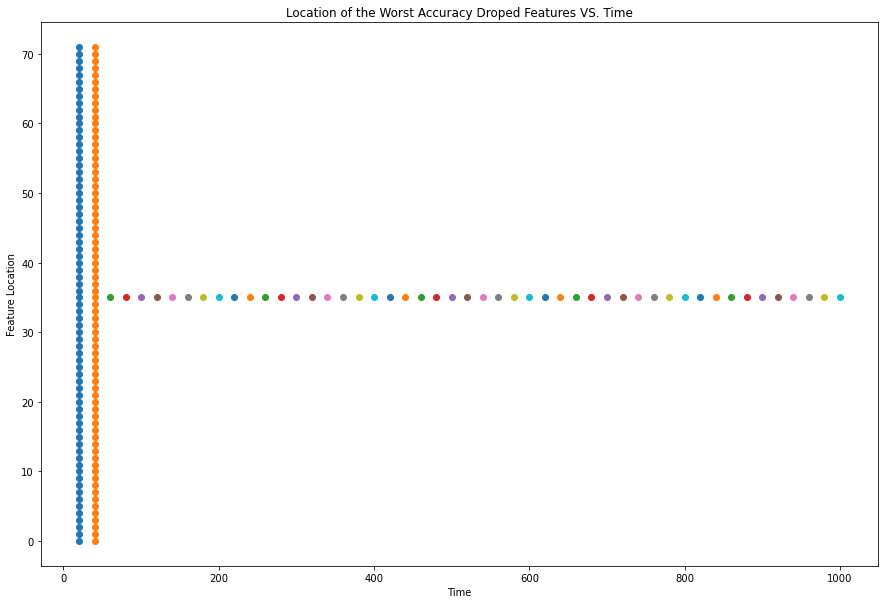

In [10]:
def most_important_features(dict_train):
    adrops = []
    min_dict={}
    num=0
    for run in range(len(dict_train)):
    #     plt.figure()
        adrop = dict_train[run]["mltsa"] # (200,72)
    #     print(np.array(adrop).shape) # (200,72)
        mean = np.mean(adrop, axis=0) # (72,)
        adrops.append(mean)
        time_mean_adrops=np.mean(np.array(adrops),axis=0)# (73,)
    #     print(time_mean_adrops.shape)
        min_feature=np.min(time_mean_adrops)
        location=np.where(time_mean_adrops==min_feature)[0]
        min_dict[num]=location
        num+=1
    return min_dict
# min_dict=most_important_features(dict_train)

def dots_plot_most_important_features(dict_train):
    min_dict=most_important_features(dict_train)
    plt.figure(figsize=(15,10))
    plt.title("Location of the Worst Accuracy Droped Features VS. Time",x=0.5,y=1)
    for time in range(len(min_dict)):
        plt.scatter([step_size*list(min_dict.keys())[time]+step_size]*min_dict[time].shape[0],min_dict[time])
    plt.ylabel("Feature Location")
    plt.xlabel("Time")
    
dots_plot_most_important_features(dict_train)

In [157]:
np.array(Adrops).shape

(50, 200, 73)

In [60]:
np.mean(a, axis=0).shape

(200, 73)

In [61]:
a.shape

(50, 200, 73)

In [128]:
test=np.array([[[1,2],[3,4],[4,5]]])

In [129]:
test

array([[[1, 2],
        [3, 4],
        [4, 5]]])

In [130]:
test.shape

(1, 3, 2)

In [131]:
test=np.mean(test,axis=0)

In [132]:
test.shape

(3, 2)

In [133]:
test

array([[1., 2.],
       [3., 4.],
       [4., 5.]])

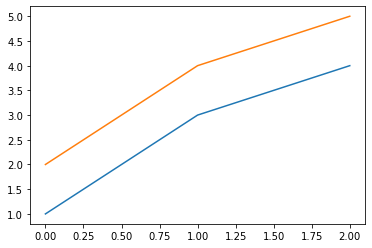

In [134]:
plt.plot(test)